In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

<ipython-input-1-967f56685381>:3: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)


In [2]:
DARK_CURRENT = 0.15 #e/p/s
READ_NOISE = 9.3 #e

In [3]:
data = {
    "AutoAdaptiveWeighted":{
        "exposure_time": [5065], #s
        "n_pixel":       [39],
        "S_source":     [6297.26], #ADU
        "n_pixel_Sky":  [197],
        "S_sky":        [5998.39] #ADU
    },
    "Average":{
        "exposure_time": [5065], #s
        "n_pixel":       [39],
        "S_source":     [6286.79], #ADU
        "n_pixel_Sky":  [196],
        "S_sky":        [6005.84] #ADU
    },
        "HDR":{
        "exposure_time": [5065], #s
        "n_pixel":       [39],
        "S_source":     [6189.13], #ADU
        "n_pixel_Sky":  [197],
        "S_sky":        [5947.56] #ADU
    },
        "kappa2":{
        "exposure_time": [5065], #s
        "n_pixel":       [39],
        "S_source":     [6274.79], #ADU
        "n_pixel_Sky":  [195],
        "S_sky":        [6000.38] #ADU
    },
        "maximum":{
        "exposure_time": [5065], #s
        "n_pixel":       [40],
        "S_source":     [7031.5], #ADU
        "n_pixel_Sky":  [195],
        "S_sky":        [6492.57] #ADU
    },
        "median":{
        "exposure_time": [5065], #s
        "n_pixel":       [40],
        "S_source":     [6316.85], #ADU
        "n_pixel_Sky":  [194],
        "S_sky":        [6001.47] #ADU
    }
}

In [4]:
class Star:
    def __init__(self,  exposure_time=None, n_pixel=None, S_source=None, n_pixel_sky=None, S_sky=None):
        self.exposure_time = exposure_time
        self.n_pixel = n_pixel 
        self.S_source = S_source
        self.n_pixel_sky = n_pixel_sky
        self.S_sky = S_sky
        self.name = ""

    def SNR(self):
        return self.S_source/np.sqrt(self.S_source + self.n_pixel*(1+(self.n_pixel/self.n_pixel_sky))*(self.S_sky + self.exposure_time*DARK_CURRENT + READ_NOISE**2))


class StarData():
    def __init__(self, name=""):
        self.name = name
        self.starInTime = []
        self.star = Star()

    def load(self, data):
        star_data =  data.get(self.name)
        for exposure_time, n_pixel, S_source, n_pixel_sky, S_sky in zip(star_data["exposure_time"], 
                                                                        star_data["n_pixel"], 
                                                                        star_data["S_source"], 
                                                                        star_data["n_pixel_Sky"], 
                                                                        star_data["S_sky"]):
            self.star = Star(exposure_time, n_pixel, S_source, n_pixel_sky, S_sky)
            self.starInTime.append(self.star)

In [5]:
SNR_dict = {}
for star_name in data.keys():
    starData = StarData(star_name)
    starData.load(data)
    list_of_snr = [ star.SNR() for star in  starData.starInTime]
    SNR_dict[star_name] = list_of_snr

In [6]:
exposure_time = data["AutoAdaptiveWeighted"]["exposure_time"]

In [7]:
SNR_dict

{'AutoAdaptiveWeighted': [11.027750320657534],
 'Average': [10.999173939749074],
 'HDR': [10.879894605095496],
 'kappa2': [10.978092465636939],
 'maximum': [11.706170651290142],
 'median': [10.886248068312717]}

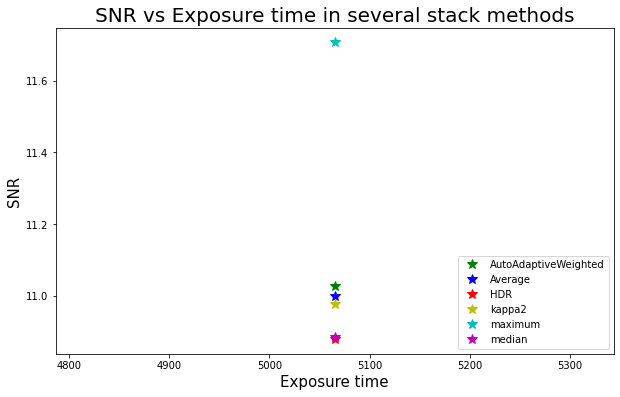

In [8]:

fig, ax1 = plt.subplots(figsize=(10,6))
plt.plot(exposure_time, SNR_dict["AutoAdaptiveWeighted"], 'g*', markersize=10, label='AutoAdaptiveWeighted')
plt.plot(exposure_time, SNR_dict["Average"], 'b*', markersize=10, label='Average')
plt.plot(exposure_time, SNR_dict["HDR"], 'r*', markersize=10, label='HDR')
plt.plot(exposure_time, SNR_dict["kappa2"], 'y*', markersize=10, label='kappa2')
plt.plot(exposure_time, SNR_dict["maximum"], 'c*', markersize=10, label='maximum')
plt.plot(exposure_time, SNR_dict["median"], 'm*', markersize=10, label='median')

ax1.set_title('SNR vs Exposure time in several stack methods', fontsize=20)
ax1.set_xlabel('Exposure time', fontsize=15)
ax1.set_ylabel('SNR',fontsize=15)
ax1.legend(loc=4)
